In [1]:
#Analysis for output of PSP_amp_vs_time_for_manuscript.py

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import scipy.stats as stats

In [3]:
#
path='/home/corinnet/workspace/aiephys/rundown_results_Aug_10_2018_for_manuscript/'
connection_folders=[os.path.join(path, d) for d in os.listdir(path)] 

# get all the csv files
csvs=[]
for folder in connection_folders:
    files=os.listdir(folder)
    try:
        csvs.append(os.path.join(folder,np.array(files)[np.array([file.endswith('.csv') for file in files])][0]))
    except:
        pass
#print csvs

In [4]:
# neurons who's single psp fits looked reasonable thoughout the experiment.
# note that there still may be quite a few errors in fits
sim1=['1487367784.96_6_2_sim1_sim1',
        '1497469151.70_8_1_sim1_sim1',
        '1497469151.70_1_8_sim1_sim1',
        '1487376645.68_1_7_sim1_sim1',
        '1497469151.70_8_5_sim1_sim1',
        '1497468556.18_8_2_sim1_sim1',
        '1497468556.18_8_6_sim1_sim1',
        '1490651901.46_4_8_sim1_sim1',
        '1487107236.82_7_5_sim1_sim1',
        '1487107236.82_7_2_sim1_sim1',
        '1490651407.27_2_5_sim1_sim1',
        '1497469151.70_1_2_sim1_sim1'] #12

           
unknown=['1523470754.85_6_4_unknown_unknown',           
        '1501101571.17_1_5_unknown_unknown',
        '1501792378.34_2_8_unknown_unknown',
        '1501104688.89_7_3_unknown_unknown',
        '1501101571.17_7_5_unknown_unknown',
        '1502301827.80_8_6_unknown_unknown',
        '1502301827.80_6_8_unknown_unknown',
        '1501627688.56_3_8_unknown_unknown',
        '1501792378.34_8_2_unknown_unknown',
        '1501090950.86_8_1_unknown_unknown'] #10

           
tlx3=['1485904693.10_8_2_tlx3_tlx3',
        '1492545925.15_8_6_tlx3_tlx3',
        '1502920642.09_7_8_tlx3_tlx3',
        '1492545925.15_4_2_tlx3_tlx3',
        '1492812013.49_5_3_tlx3_tlx3',
        '1492545925.15_2_4_tlx3_tlx3',
        '1492468194.97_6_5_tlx3_tlx3',
        '1492460382.78_6_2_tlx3_tlx3',
        '1492545925.15_8_5_tlx3_tlx3'] #9
           
rorb=['1523470754.85_3_4_rorb_rorb',
        '1523470754.85_7_3_rorb_rorb',
        '1523470754.85_4_6_rorb_rorb',
        '1523470754.85_7_6_rorb_rorb',
        '1523470754.85_7_4_rorb_rorb'] #5

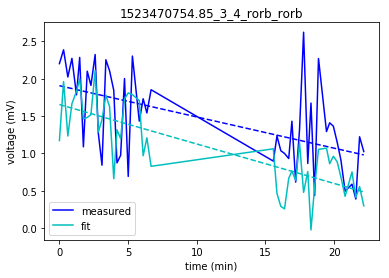

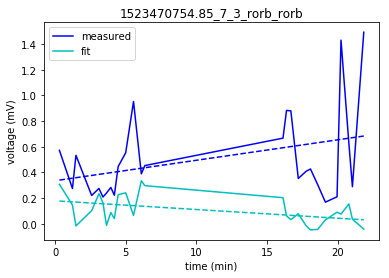

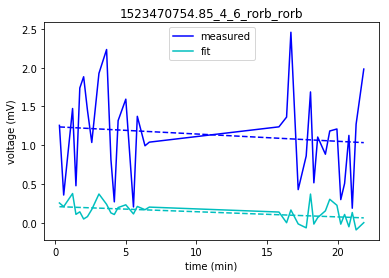

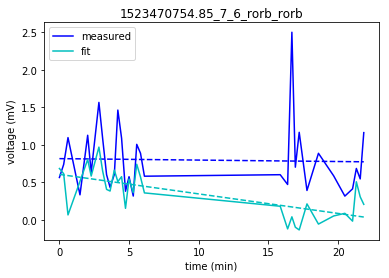

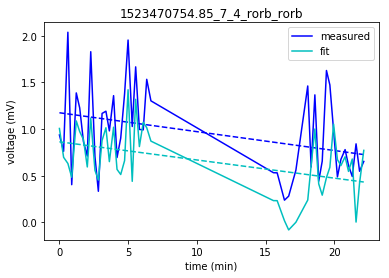

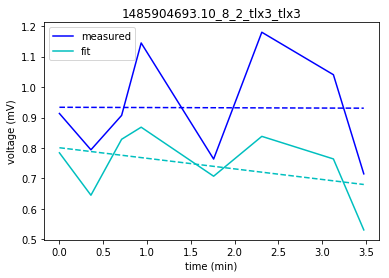

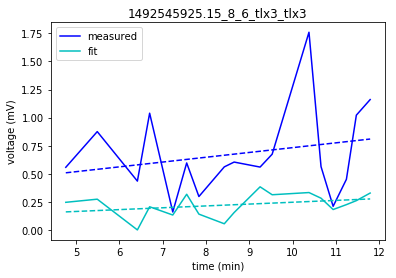

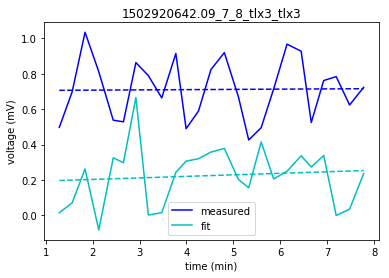

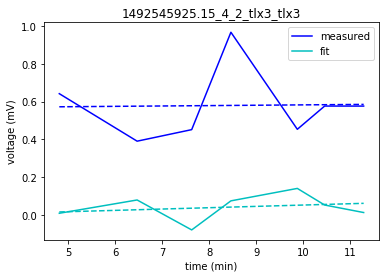

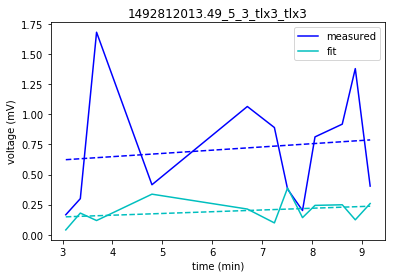

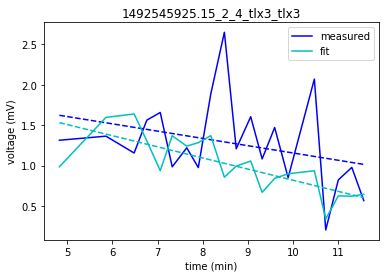

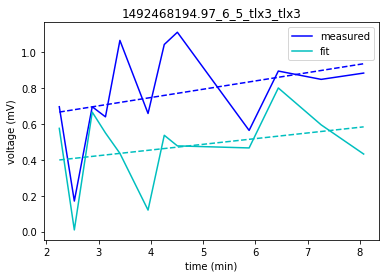

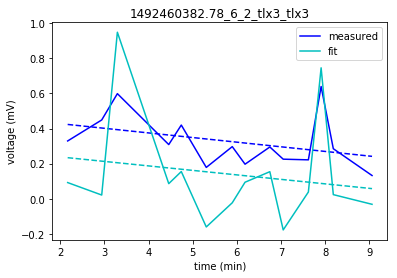

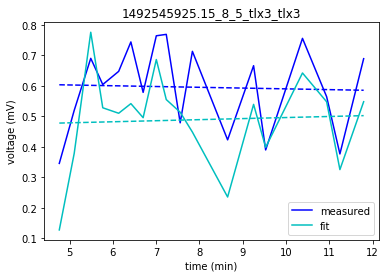

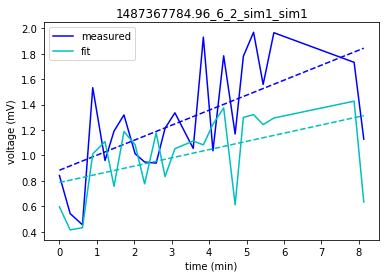

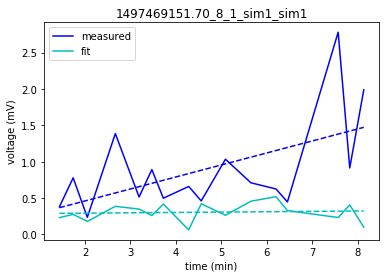

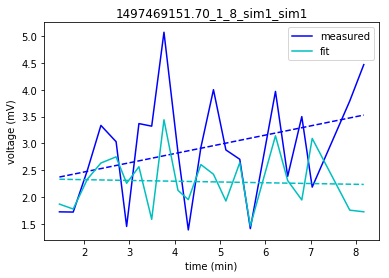

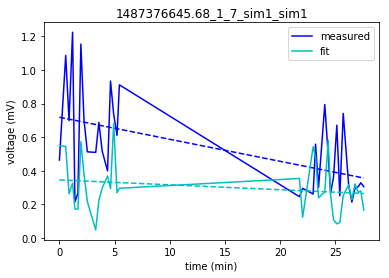

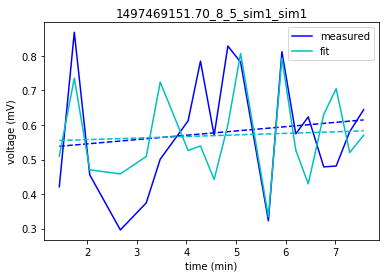

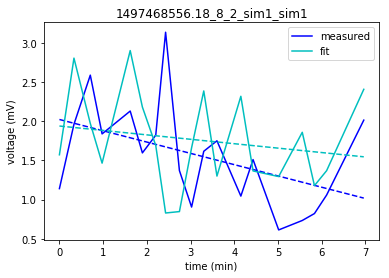

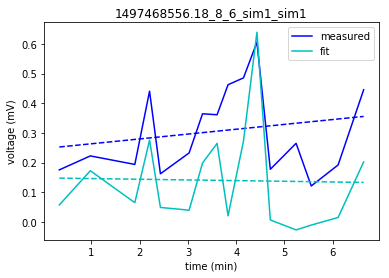

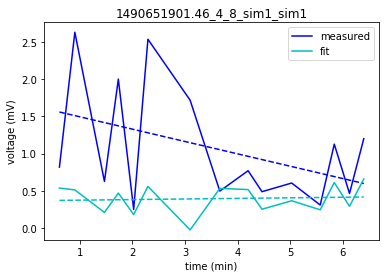

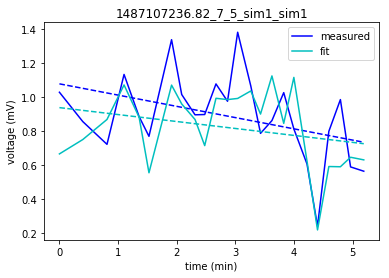

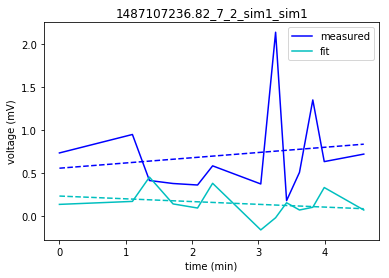

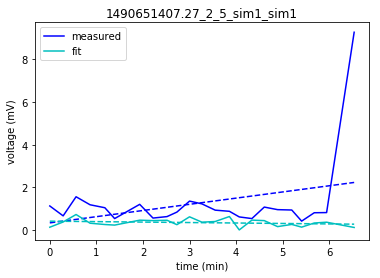

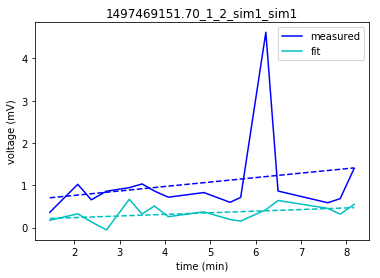

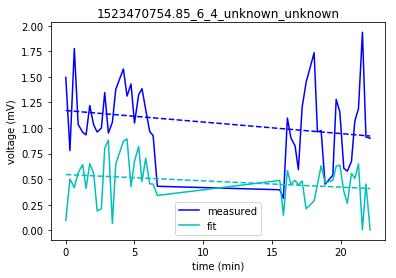

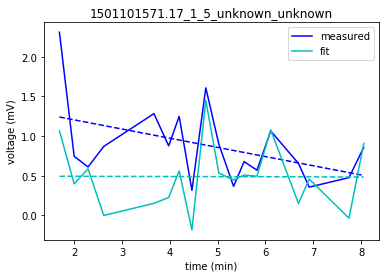

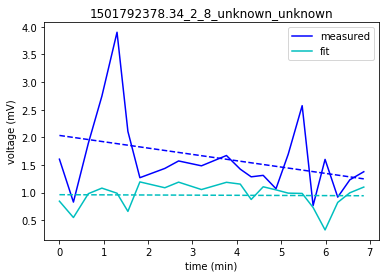

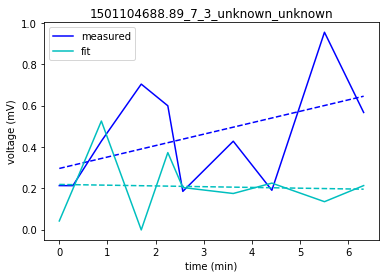

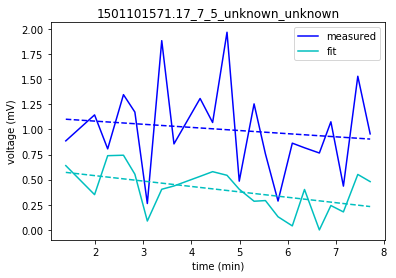

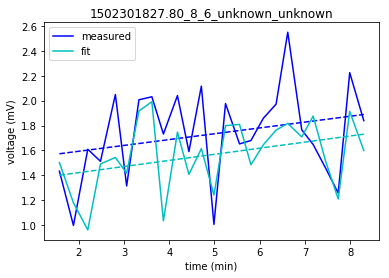

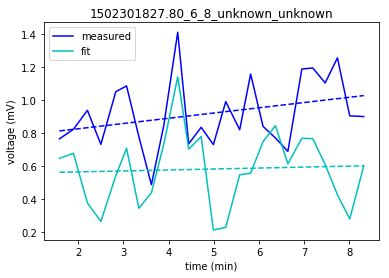

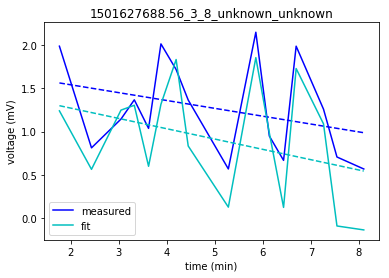

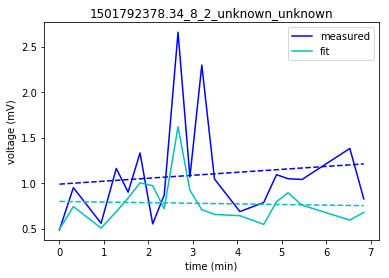

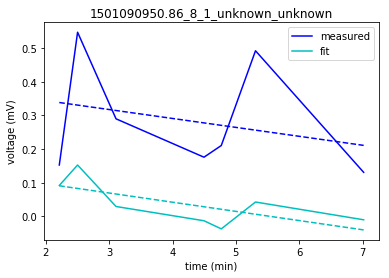

In [5]:
#Plot time versus amplitude
def make_plot(df, title):
    """ Plot time versus amplitude for fit and measured values
    
    Input
    -----
    df: pandas data frame
        contains data needed to make plot. See code for more info
    title: string
        title to go on the plot
    """
    measured_amp=df[(df.stim_type==50) & (df.measured_amp>0)].measured_amp.values
    fit_amp=df[(df.stim_type==50) & (df.measured_amp>0)].fit_amp.values
    time=df[(df.stim_type==50) & (df.measured_amp>0)].time.values/60.
    df[(df.stim_type==50) & (df.measured_amp>0)].fit_amp
    slope_measured, intercept_measured, _, _, _=stats.linregress(time, measured_amp)
    slope_fit, intercept_fit, _, _, _=stats.linregress(time, fit_amp)
    plt.figure()
    plt.plot(time, measured_amp*1e3, 'b', label='measured')
    plt.plot(time, (slope_measured*time+intercept_measured)*1e3, 'b--')
    
    plt.plot(time, fit_amp*1e3, 'c', label='fit')
    plt.plot(time, (slope_fit*time+intercept_fit)*1e3, 'c--')

    plt.title(os.path.dirname(file).split('/')[-1])
    plt.title(title)
    plt.ylabel('voltage (mV)')
    plt.xlabel('time (min)')
    plt.legend()
    plt.show()
    
def plot_believable_experiments(good_expt_list):    
    '''cycles though list of experiments, loads the dataframe from file
    and plots time versus psps amplitude or all experiments in the list'''
    for s in good_expt_list:
        #look up corresponding file name for string provided in the expt list
        file=[file for file in csvs if s in file]
        if len(file)>1: raise Exception()
        df = pd.read_csv(file[0])
        make_plot(df,s)
        
plot_believable_experiments(rorb)
plot_believable_experiments(tlx3)
plot_believable_experiments(sim1)
plot_believable_experiments(unknown)

sim1 AVG: percent per min -0.612885, std 3.199475, median -1.414907


rorb AVG: percent per min -3.878785, std 0.808491, median -4.036543


unknown AVG: percent per min -3.672959, std 3.784801, median -1.902987


tlx3 AVG: percent per min -1.906823, std 5.266101, median -1.545002


max time: ave 13.882539, standard deviation 5.158542, median 11.553017


Text(0,0.5,'percent per minute')

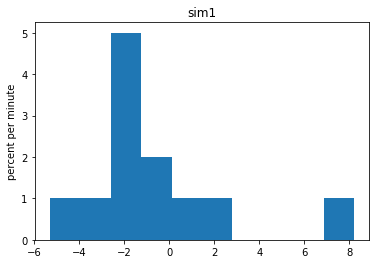

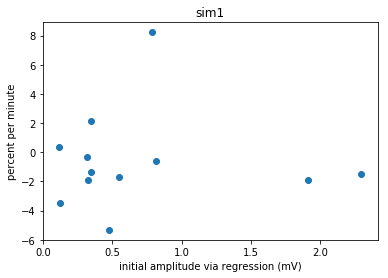

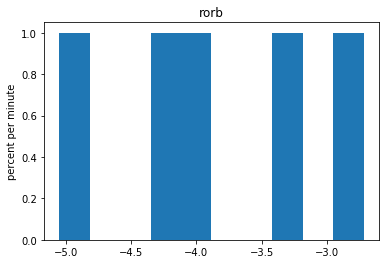

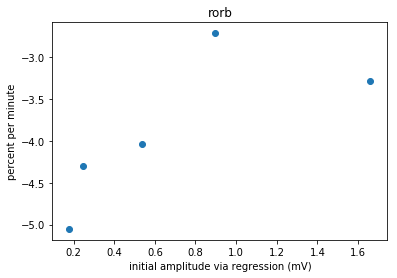

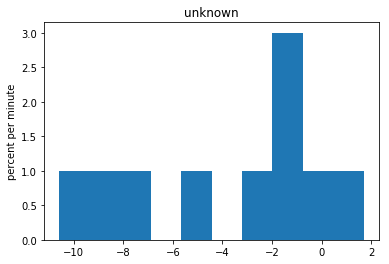

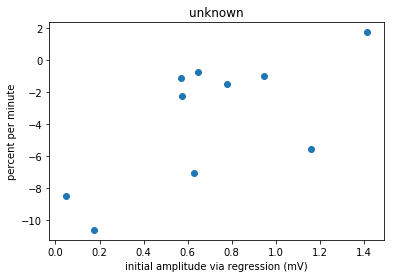

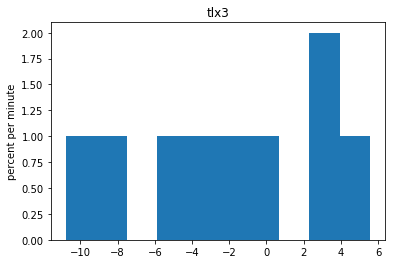

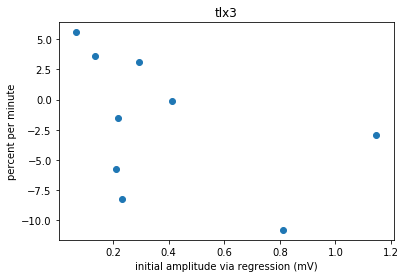

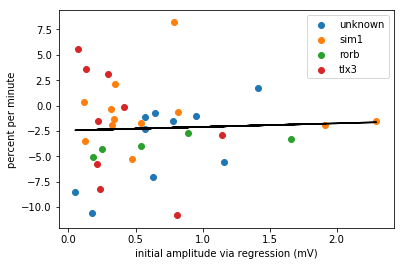

In [9]:
#get percent decay per min from the fits

def percent_decay(time, amp):
    """percent decay per time as fit by a linear regression
    
    Input
    -----
    time: array like
        time of response in min (unless want a different time unit)
    amp: array like
        amplitude correspondng with times
    
    Returns
    -------
    percent_per_min: float
        percent per minute (or input time scale) decay via linear regression 
    percent_total: float 
        total rundown over time of regression as specified by 
        linear regression 
    slope: float
        slope of fit line
    intercept: float
        intercept of fit line
    """
    slope, intercept, _, _, _=stats.linregress(time, amp)
    percent_per_min=(slope/intercept)*100
#    print ('start %2f, ppm %2f, time %2f, total percent %2f' %(intercept, percent_per_min, time[-1], percent_per_min*time[-1])) 
    percent_total=percent_per_min*time[-1]
    return percent_per_min, percent_total, slope, intercept

def plot_regression(time, amp, time_shortened, amp_shortened, slope, intercept, title):
    plt.figure()
    plt.plot(time, amp*1e3, 'c', label='fit')
    plt.plot(time_shortened, (slope*time_shortened+intercept)*1e3, 'c--')

    plt.title(os.path.dirname(title).split('/')[-1])
    plt.title(title)
    plt.ylabel('voltage (mV)')
    plt.xlabel('time (min)')
    plt.legend()
    plt.show()

def group_percent_decay(good_expt_list, max_time=50., plot=False, title=''):
    """cycles through the list of input experiments and returns a list 
    decays.
    good_expt_list: list of strings
        strings are subsets of csv file names
    max_time: float
        maximum time to be considered in the regression
    plot: True, False
        plot individual regressions
    title: string
        title on group output histograms
    """
    percent_per_min=[]
    percent_total=[]
    initial_amp=[]
    big_time=[]
    for s in good_expt_list:
        file=[file for file in csvs if s in file]
        if len(file)>1: raise Exception()
#        print(s)
        df = pd.read_csv(file[0])
    #could screen for specific things here
#         amp=df[(df.stim_type==50) & (df.measured_amp>0)].fit_amp.values
#         time=df[(df.stim_type==50) & (df.measured_amp>0)].time.values/60.
#         amp=df[(df.stim_type==50)].fit_amp.values
#         time=df[(df.stim_type==50)].time.values/60.
        amp=df.fit_amp.values
        time=df.time.values/60.
        less_th=time<max_time
        time_shortened=time[less_th]
        amp_shortened=amp[less_th]
        ppm, pt, slope, intercept=percent_decay(time_shortened, amp_shortened)
        #print ppm, pt, slope, intercept
        if plot:
            plot_regression(time, amp, time_shortened, amp_shortened, slope, intercept,s)
        initial_amp.append(intercept)
        percent_per_min.append(ppm)
        percent_total.append(pt)
        big_time.append(time_shortened[-1])
    
    #plot histagram of decays
    plt.figure()
    plt.hist(percent_per_min)
    plt.ylabel('percent per minute')
    plt.title(title)
    
    #plot relationship between amplidute and percent decay
    plt.figure()
    plt.scatter(np.array(initial_amp)*1.e3, percent_per_min)
    plt.xlabel('initial amplitude via regression (mV)')
    plt.ylabel('percent per minute')
    plt.title(title)
    return percent_per_min, percent_total, initial_amp, big_time

# look at decay in cre groups and over combined data
dict={} #dictionary organizing output
ppm_all=[]
initial_amp_all=[]
max_time_all=[]
for cre in ['sim1', 'rorb', 'unknown', 'tlx3']:
    dict[cre]={}
    ppm, pt, initial_amp, max_time=group_percent_decay(eval(cre), title=cre)
    print (cre+' AVG: percent per min %3f, std %3f, median %3f' % (np.mean(ppm), np.std(ppm), np.median(ppm)))
    print ('\n')    
    ppm_all=ppm_all+ppm
    #append cre specific list
    initial_amp_all= initial_amp_all +initial_amp
    max_time_all=max_time_all+max_time
    dict[cre]['ppm']=ppm
    dict[cre]['initial_amp']=initial_amp

#print statistics for length of experiment
print ('max time: ave %f, standard deviation %f, median %f' % (np.mean(max_time_all), np.std(max_time_all), np.median(max_time_all)))    

# percent decay all on on one plot
plt.figure()
for cre in dict.keys():
    plt.scatter(np.array(dict[cre]['initial_amp'])*1.e3, dict[cre]['ppm'], label=cre)
plt.legend()
#plot linear regression to all data on plot
slope, intercept, rvalue, pvalue, sterr=stats.linregress(np.array(initial_amp_all)*1e3, np.array(ppm_all))
plt.plot(np.array(initial_amp_all)*1e3, slope*np.array(initial_amp_all)*1e3+intercept, 'k')
plt.xlabel('initial amplitude via regression (mV)')
plt.ylabel('percent per minute')